In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
import pylab
import warnings
warnings.filterwarnings('ignore')

In [66]:
df = pd.read_csv("insurance.csv")

In [67]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [68]:
df.shape

(1338, 7)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are not any null values now let's move on data analysis

# Univariate Analysis

In [70]:
df['age'].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

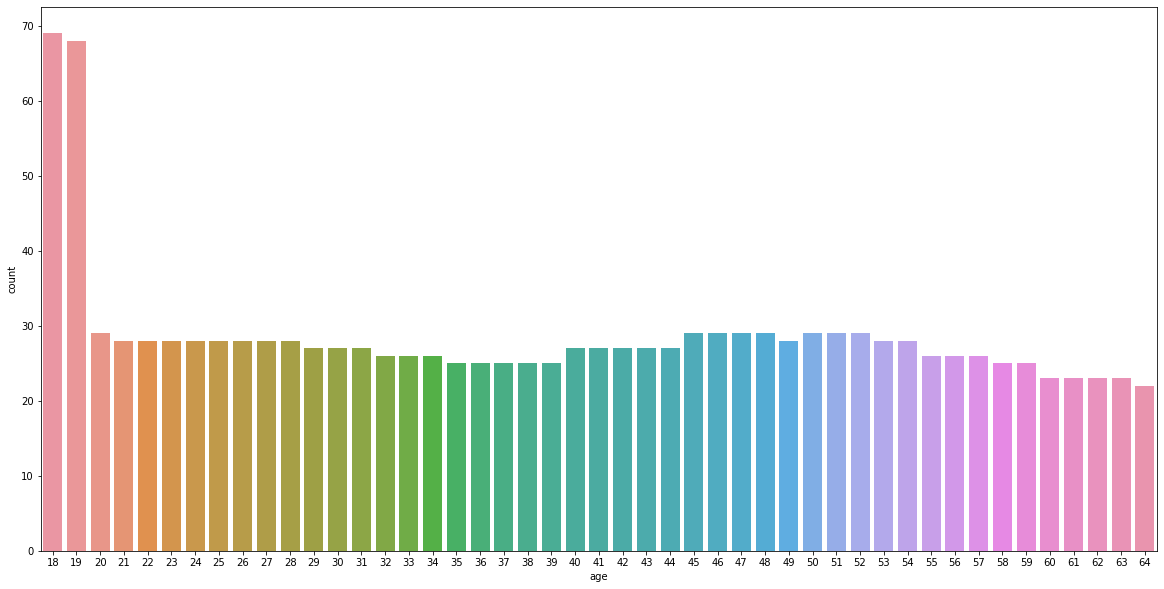

In [71]:
plt.figure(figsize=(20,10))
sns.countplot('age',data=df);

In [72]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

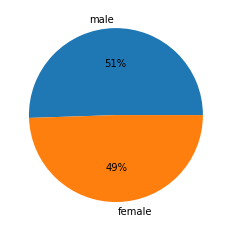

In [73]:
plt.pie(df['sex'].value_counts(),labels=['male','female'],autopct='%.0f%%');

In [74]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

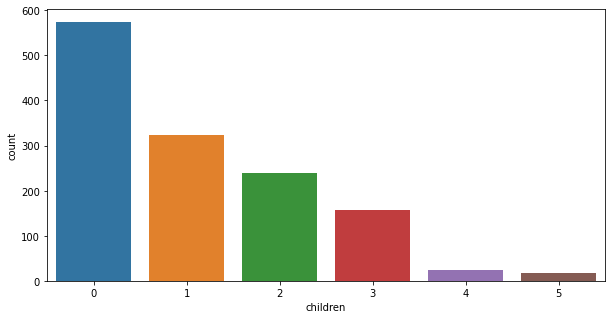

In [75]:
plt.figure(figsize=(10,5))
sns.countplot(df['children']);

In [76]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

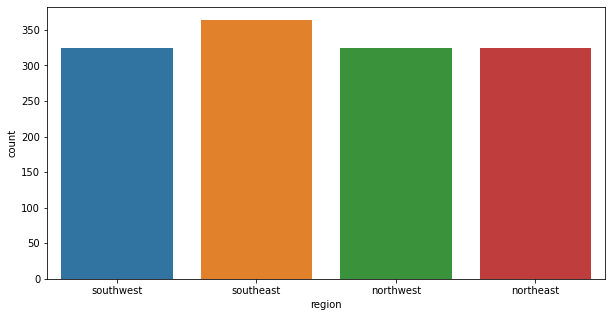

In [77]:
plt.figure(figsize=(10,5))
sns.countplot(df['region']);

# Bi-Variate Analysis

In [78]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [79]:
df.groupby('age')['sex'].value_counts()

age  sex   
18   male      36
     female    33
19   male      35
     female    33
20   male      15
               ..
62   male      11
63   female    12
     male      11
64   female    11
     male      11
Name: sex, Length: 94, dtype: int64

<AxesSubplot:xlabel='age', ylabel='count'>

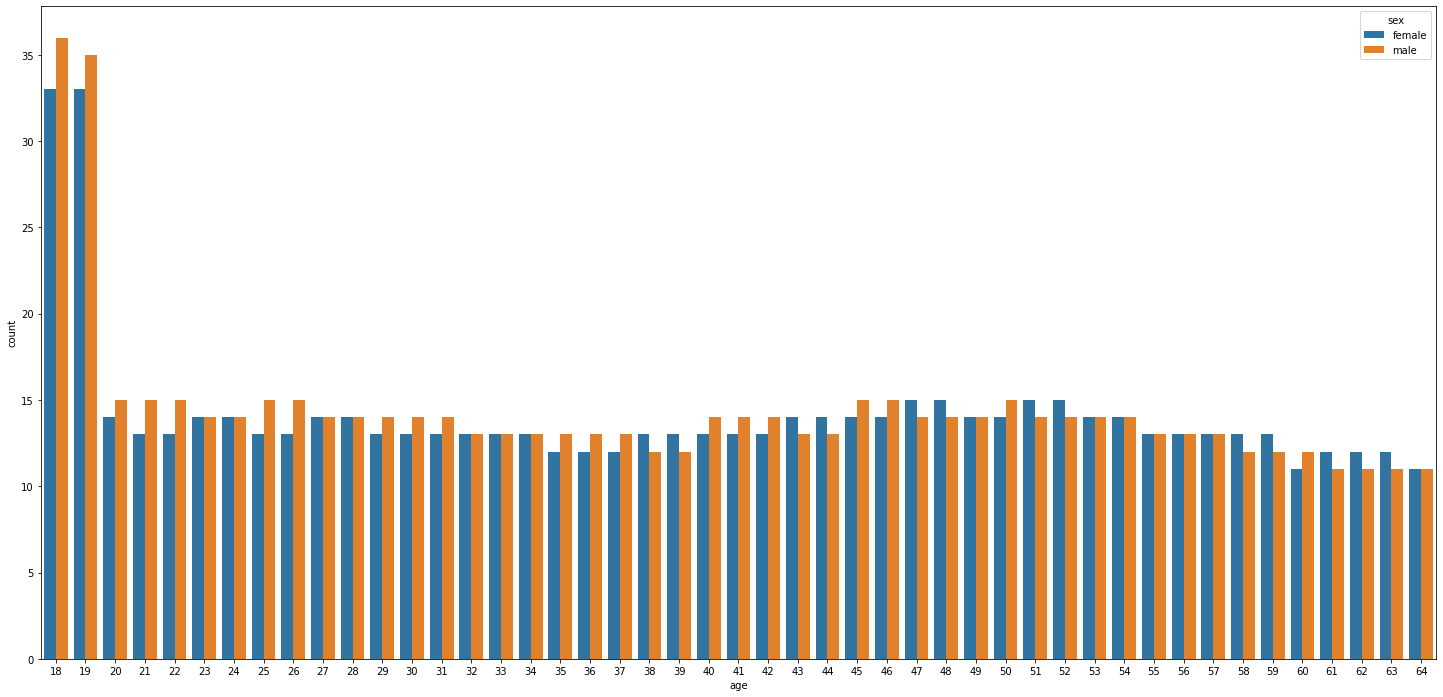

In [80]:
plt.figure(figsize=(25,12))
sns.countplot(df['age'],hue=df['sex'])

In [81]:
df.groupby('children')['sex'].value_counts()

children  sex   
0         female    289
          male      285
1         male      166
          female    158
2         male      121
          female    119
3         male       80
          female     77
4         male       14
          female     11
5         male       10
          female      8
Name: sex, dtype: int64

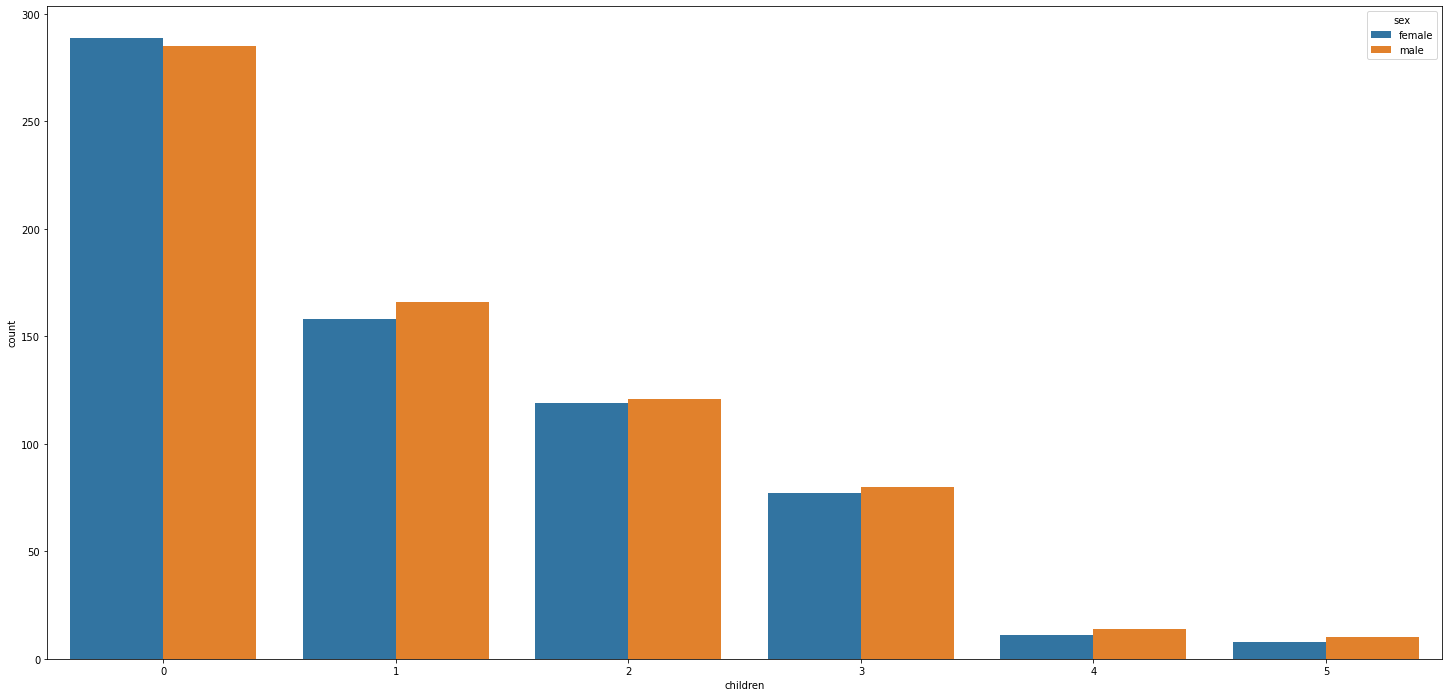

In [82]:
plt.figure(figsize=(25,12))
sns.countplot(df['children'],hue=df['sex']);

In [83]:
a = df.groupby('region')['sex'].value_counts()
a

region     sex   
northeast  male      163
           female    161
northwest  female    164
           male      161
southeast  male      189
           female    175
southwest  male      163
           female    162
Name: sex, dtype: int64

array([<AxesSubplot:ylabel='sex'>], dtype=object)

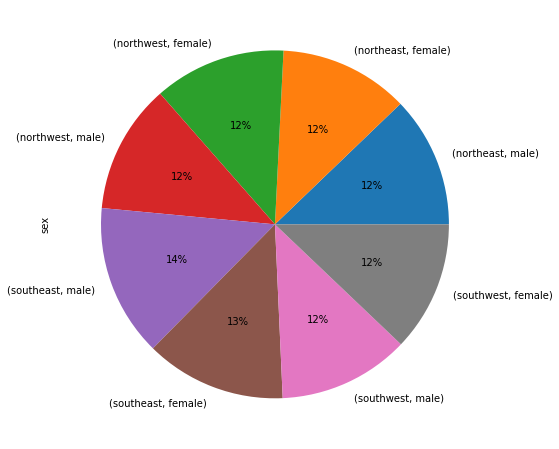

In [84]:
a.plot.pie(subplots=True,figsize=(15,8),autopct='%.0f%%')


In [85]:
df.groupby('smoker')['sex'].value_counts()

smoker  sex   
no      female    547
        male      517
yes     male      159
        female    115
Name: sex, dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='count'>

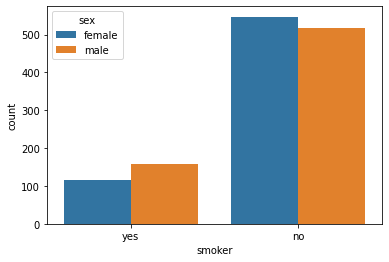

In [86]:
sns.countplot(df['smoker'],hue=df['sex'])

In [87]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [88]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


# i want to check relation between sex and smoker using Chi-Squared

In [89]:
observation_table = pd.crosstab(df['sex'],df['smoker'])
observation_table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [90]:
chi_squared_value, p_value, degree_of_freedom, expectation_table = st.chi2_contingency(observation_table)

In [91]:
alpha = 0.05
if p_value<alpha:
    print("there is No Relation between sex and smoker ")
else:
    print("there is Relation between sex and smoker ")

there is No Relation between sex and smoker 


# i want to check relation between smoker and region using Chi-Squared

In [92]:
observation_table1 = pd.crosstab(df['smoker'],df['region'])
observation_table1

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [93]:
chi_squared_value1, p_value1, degree_of_freedom1, expectation_table1 = st.chi2_contingency(observation_table1)

In [94]:
alpha = 0.05
if p_value1<alpha:
    print("there is No Relation between sex and smoker ")
else:
    print("there is Relation between sex and smoker ")

there is Relation between sex and smoker 


In [95]:
observation_table2 = pd.crosstab(df['sex'],df['region'])
observation_table2

region,northeast,northwest,southeast,southwest
sex,,,,
female,161,164,175,162
male,163,161,189,163


In [96]:
chi_squared_value2, p_value2, degree_of_freedom2, expectation_table2 = st.chi2_contingency(observation_table2)

In [97]:
alpha = 0.05
if p_value2<alpha:
    print("there is No Relation between sex and smoker ")
else:
    print("there is Relation between sex and smoker ")

there is Relation between sex and smoker 


# now i want to check relation between numerical columns

In [98]:
df.corr(method='spearman')

,age,bmi,children,charges
age,1.000000,0.107736,0.056992,0.534392
bmi,0.107736,1.000000,0.015607,0.119396
children,0.056992,0.015607,1.000000,0.133339
charges,0.534392,0.119396,0.133339,1.000000


<AxesSubplot:>

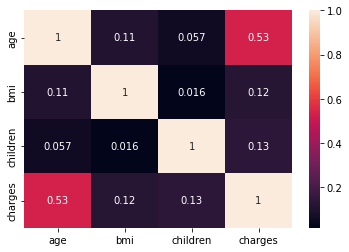

In [99]:
sns.heatmap(df.corr(method='spearman'),annot=True)

# Feature Encoding
Label Encoding the categorical variables

In [100]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [101]:
# df['sex'].unique()
# df['sex'] = df['sex'].map({'male':0,'female':1})
# df['smoker'] = df['smoker'].map({'yes':0,'no':1})
# df['region'] = df['region'].map({'southeast':0,'southwest':1,'northeast':2,'northwest':3}) 

In [105]:
from sklearn.preprocessing import LabelEncoder
encoder={}
for i in df.select_dtypes(include='object').columns:
    encoder[i]=LabelEncoder()
    df[i]=encoder[i].fit_transform(df[i])


In [106]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Checking Normally Distributed or not

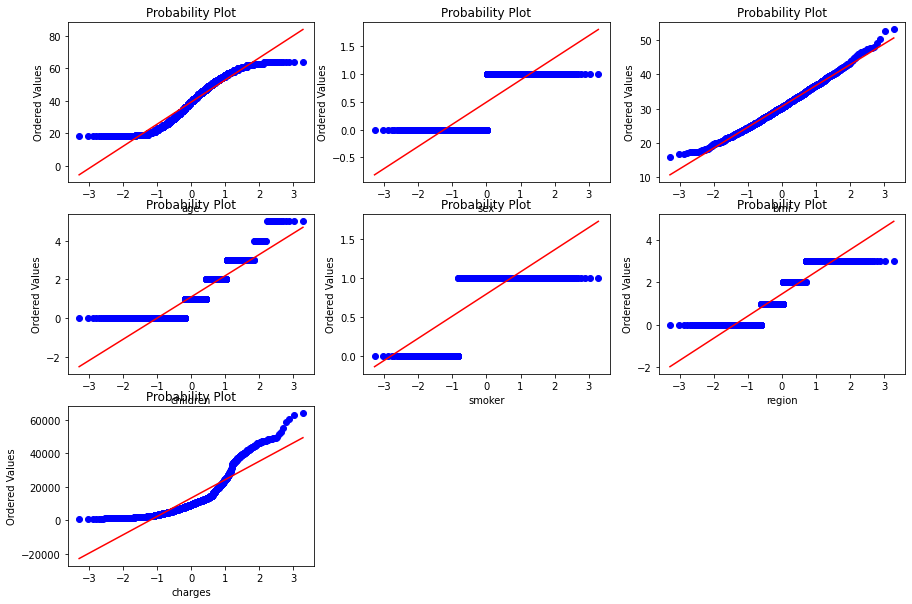

In [42]:
plt.figure(figsize=(15,10));
plot=1
for i in df.columns:
    plt.subplot(3,3,plot)
    st.probplot(df[i],dist='norm',plot=pylab)
    plt.xlabel(i)
    plot +=1

In [43]:
df.skew()

age         0.055673
sex         0.020951
bmi         0.284047
children    0.938380
smoker     -1.464766
region      0.048975
charges     1.515880
dtype: float64

In [44]:
df.kurtosis()

age        -1.245088
sex        -2.002557
bmi        -0.050732
children    0.202454
smoker      0.145756
region     -1.387388
charges     1.606299
dtype: float64

In [45]:
x = st.yeojohnson(df['charges'])
x = x[0]
x = pd.Series(x)
print("skewness : ",x.skew())
print("kurtosis : ",x.kurtosis())
df['charges'] = x

skewness :  -0.008708879288063982
kurtosis :  -0.6504036533708604


# Data divided in x and y form

In [46]:
x = df.drop(columns='charges')
y = df['charges']

# Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()
x = scaler.fit_transform(x)


# Data x and y divided into train and test data

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [51]:
print(x_train.shape)
print(x_test.shape)

(1070, 6)
(268, 6)


# Apply Linear Regression Model

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lr = LinearRegression()

In [54]:
lr.fit(x_train,y_train)

LinearRegression()

In [55]:
y_pred = lr.predict(x_test)
y_pred[:20]

array([11.27699115, 11.019641  , 13.89979599, 11.88130402, 11.01204644,
       10.09286448,  9.4558677 , 11.81852519, 11.02727632, 10.61961334,
       10.52974389, 11.41280645, 10.88407488, 10.06233432, 12.29927047,
       11.42420128, 11.53180453, 10.06180869, 10.79770118, 11.93401582])

In [56]:
y_test[:20].values

array([11.28837   , 11.09656587, 13.67551501, 11.71818959, 11.27601145,
       10.1585454 ,  9.14150169, 11.53106142, 10.91052014, 10.42907971,
       10.74891083, 11.40210551, 10.87100162, 10.05400326, 12.2451659 ,
       11.43157989, 11.66766601,  9.79421898, 10.68337696, 13.18225971])

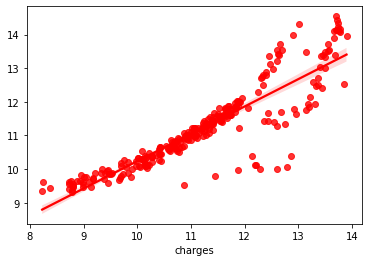

In [57]:
sns.regplot(y_test,y_pred,color='r');

# Check Accuracy of the model

In [58]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [59]:
r2_score(y_test,y_pred)


0.7911404955856294

In [60]:
mae = mean_absolute_error(y_test,y_pred)
mae

0.3914000120732375

In [61]:
mape = mean_absolute_percentage_error(y_test,y_pred)
mape

0.034709804936019675

In [62]:
mse = mean_squared_error(y_test,y_pred)
mse

0.388196201473617

In [63]:
mse = mean_squared_error(y_test,y_pred)
mse

0.388196201473617